## NYC Crime Stats:

### <u>Source Description (by author):</u>
> This dataset was compiled for use in our capstone project for the M.S. in Data Science at Drexel University. We collected our data through thousands of calls to the NYC OpenData platform. After collecting all the data, we dropped columns that we didn't think add value. Despite our best effort, due to time constraints, we weren't able to scrub all null values for the less frequently used attributes like any of the "computed_region" colunns. However, the dataset is in a usable form and ~95% cleaned.

### <u>Content:</u>
While most of the data like "arrest_date" and "age_group" are straightforward, here is a key for some items that may be less obvious.
- pd_desc: Description of internal classification corresponding with PD code (more granular than Offense Description) 
- ofns_desc: Description of offense corresponding with key code law_code NY penal law code of offense. 
- law_cat_cd: Level of offense: felony, misdemeanor, violation 
- arrest_boro: The borough of NYC where the arrest took place 
- arrest_precinct: Police precinct that the arrest took place 
- jurisdiction_code: Jurisdiction responsible for incident.
- :@computed_region_f5dn_yrer: Community Districts 
- :@computed_region_yeji_bk3q: Borough Boundaries 
- :@computed_region_92fq_4b7q: City Council Districts 
- :@computed_region_sbqj_enih: Police Precincts

### <u>Goal:</u>
This notebook is intended to perform EDA and feature engineering as manipulation.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from shapely.geometry import Point, Polygon

In [21]:
nyc_crime = pd.read_csv('./Data/NYC_Crime.csv').iloc[:, 1:]

In [22]:
nyc_crime.head()

,arrest_key,arrest_date,pd_desc,ofns_desc,law_code,law_cat_cd,age_group,perp_sex,perp_race,latitude,longitude,arrest_boro,arrest_precinct,jurisdiction_code,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih
0,192799737,2019-01-26,SEXUAL ABUSE,SEX CRIMES,PL 1306503,F,45-64,M,BLACK,40.800694,-73.941109,M,25,0.0,7.0,4.0,36.0,16.0
1,193260691,2019-02-06,CRIMINAL SALE OF A CONTROLLED SUBSTANCE,CONTROLLED SUBSTANCES OFFENSES,PL 2203400,F,25-44,M,UNKNOWN,40.757839,-73.991212,M,14,0.0,12.0,4.0,10.0,8.0
2,149117452,2016-01-06,RAPE 3,RAPE,PL 1302503,F,25-44,M,BLACK,40.648650,-73.950336,K,67,0.0,61.0,2.0,11.0,40.0
3,190049060,2018-11-15,RAPE 1,RAPE,PL 1303501,F,25-44,M,BLACK,40.674583,-73.930222,K,77,0.0,16.0,2.0,49.0,49.0
4,24288194,2006-09-13,"TRESPASS 3, CRIMINAL",CRIMINAL TRESPASS,PL 140100E,M,45-64,M,BLACK,40.671254,-73.926714,K,77,2.0,16.0,2.0,49.0,49.0


In [23]:
nyc_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3881989 entries, 0 to 3881988
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   arrest_key                   int64  
 1   arrest_date                  object 
 2   pd_desc                      object 
 3   ofns_desc                    object 
 4   law_code                     object 
 5   law_cat_cd                   object 
 6   age_group                    object 
 7   perp_sex                     object 
 8   perp_race                    object 
 9   latitude                     float64
 10  longitude                    float64
 11  arrest_boro                  object 
 12  arrest_precinct              int64  
 13  jurisdiction_code            float64
 14  :@computed_region_f5dn_yrer  float64
 15  :@computed_region_yeji_bk3q  float64
 16  :@computed_region_92fq_4b7q  float64
 17  :@computed_region_sbqj_enih  float64
dtypes: float64(7), int64(2), object(9)
memory 

In [30]:
for x in nyc_crime.columns:
    print('Null values of {}: {}'
          .format(x, nyc_crime[x].isnull().sum()))

Null values of arrest_key: 0
Null values of arrest_date: 0
Null values of pd_desc: 0
Null values of ofns_desc: 0
Null values of law_code: 0
Null values of law_cat_cd: 13360
Null values of age_group: 0
Null values of perp_sex: 0
Null values of perp_race: 0
Null values of latitude: 0
Null values of longitude: 0
Null values of arrest_boro: 0
Null values of arrest_precinct: 0
Null values of jurisdiction_code: 0
Null values of Community District: 5976
Null values of Borough Boundaries: 5980
Null values of City Council Districts: 5976
Null values of Police Precincts: 5977
Null values of neighbourhood_group: 5980


### -> Rename column 

In [25]:
# Reference: https://www.kaggle.com/code/lim951207/nyc-crime-stats
nyc_crime = nyc_crime.rename(columns={':@computed_region_f5dn_yrer' : 'Community District',
                             ':@computed_region_yeji_bk3q' : 'Borough Boundaries',
                             ':@computed_region_92fq_4b7q' : 'City Council Districts',
                             ':@computed_region_sbqj_enih' : 'Police Precincts'})
nyc_crime['arrest_date'] = pd.to_datetime(nyc_crime['arrest_date'], format='%Y-%m-%d')
nyc_crime['law_cat_cd'] = nyc_crime['law_cat_cd'].map({'F':'Felony',
                                                'M':'Misdemeanor',
                                                'V':'Violation',
                                                'I':'Infractions'})

In [26]:
nyc_crime.head(5)

,arrest_key,arrest_date,pd_desc,ofns_desc,law_code,law_cat_cd,age_group,perp_sex,perp_race,latitude,longitude,arrest_boro,arrest_precinct,jurisdiction_code,Community District,Borough Boundaries,City Council Districts,Police Precincts
0,192799737,2019-01-26,SEXUAL ABUSE,SEX CRIMES,PL 1306503,Felony,45-64,M,BLACK,40.800694,-73.941109,M,25,0.0,7.0,4.0,36.0,16.0
1,193260691,2019-02-06,CRIMINAL SALE OF A CONTROLLED SUBSTANCE,CONTROLLED SUBSTANCES OFFENSES,PL 2203400,Felony,25-44,M,UNKNOWN,40.757839,-73.991212,M,14,0.0,12.0,4.0,10.0,8.0
2,149117452,2016-01-06,RAPE 3,RAPE,PL 1302503,Felony,25-44,M,BLACK,40.648650,-73.950336,K,67,0.0,61.0,2.0,11.0,40.0
3,190049060,2018-11-15,RAPE 1,RAPE,PL 1303501,Felony,25-44,M,BLACK,40.674583,-73.930222,K,77,0.0,16.0,2.0,49.0,49.0
4,24288194,2006-09-13,"TRESPASS 3, CRIMINAL",CRIMINAL TRESPASS,PL 140100E,Misdemeanor,45-64,M,BLACK,40.671254,-73.926714,K,77,2.0,16.0,2.0,49.0,49.0


### -> Crime Stats Visualization:

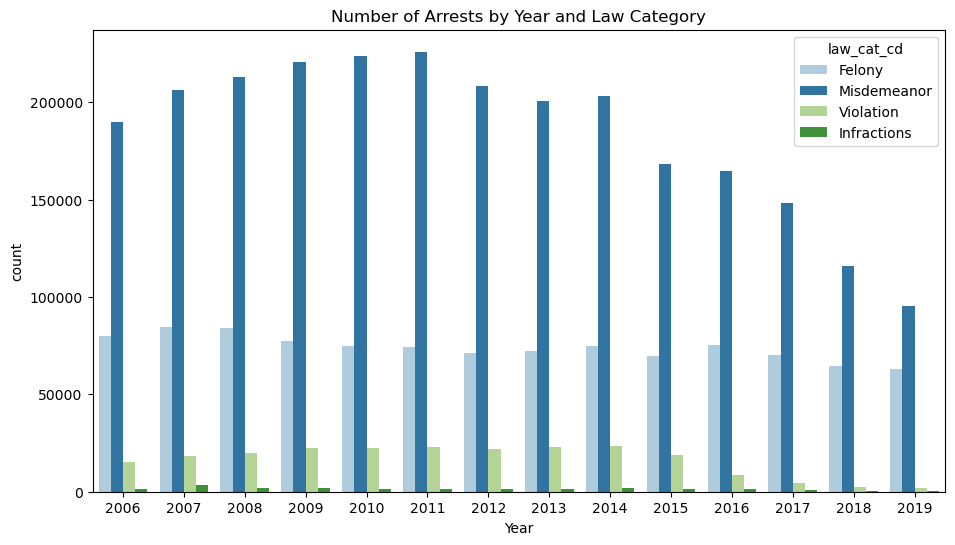

In [27]:
custom_palette = sns.color_palette("Paired", 9)
plt.figure(figsize=(11,6))
sns.countplot(x=nyc_crime['arrest_date'].dt.year, palette=custom_palette, hue=nyc_crime['law_cat_cd'])
plt.title('Number of Arrests by Year and Law Category')
plt.xlabel('Year')
plt.show()

- We can see that the crime rates shows the trend of first increasing and then falling.
- Among the crimes, misdemeanor plays the dominant role.

In [28]:
nyc_crime['neighbourhood_group'] = nyc_crime['Borough Boundaries'].map({4:'Manhattan',
                                                2:'Brooklyn',
                                                5:'Bronx',
                                                3:'Queens',
                                                1:'Staten Island'})

In [34]:
nyc_crime.head()

,arrest_key,arrest_date,pd_desc,ofns_desc,law_code,law_cat_cd,age_group,perp_sex,perp_race,latitude,longitude,arrest_boro,arrest_precinct,jurisdiction_code,Community District,Borough Boundaries,City Council Districts,Police Precincts,neighbourhood_group
0,192799737,2019-01-26,SEXUAL ABUSE,SEX CRIMES,PL 1306503,Felony,45-64,M,BLACK,40.800694,-73.941109,M,25,0.0,7.0,4.0,36.0,16.0,Manhattan
1,193260691,2019-02-06,CRIMINAL SALE OF A CONTROLLED SUBSTANCE,CONTROLLED SUBSTANCES OFFENSES,PL 2203400,Felony,25-44,M,UNKNOWN,40.757839,-73.991212,M,14,0.0,12.0,4.0,10.0,8.0,Manhattan
2,149117452,2016-01-06,RAPE 3,RAPE,PL 1302503,Felony,25-44,M,BLACK,40.648650,-73.950336,K,67,0.0,61.0,2.0,11.0,40.0,Brooklyn
3,190049060,2018-11-15,RAPE 1,RAPE,PL 1303501,Felony,25-44,M,BLACK,40.674583,-73.930222,K,77,0.0,16.0,2.0,49.0,49.0,Brooklyn
4,24288194,2006-09-13,"TRESPASS 3, CRIMINAL",CRIMINAL TRESPASS,PL 140100E,Misdemeanor,45-64,M,BLACK,40.671254,-73.926714,K,77,2.0,16.0,2.0,49.0,49.0,Brooklyn


## 1. Add neighbourhood_cd column:
- New York city has 300+ neighbours districts, and we will assign each crime to its corresponding neighbourhood code from 1-300+. Finally, we will calculate crime statistics in each disctricts and compress the giant dataset into 300+ rows, joining with airbnb dataset by this column.
- We will refer to the geometric information in fullDownload.geojson on latitude and longitude.

In [36]:
all_geo = pd.read_json('./Data/fullDownload.geojson')
all_geo = all_geo['features']

In [37]:
def filter_ny(all):
    for i in range(len(all)):
        if all[i]['properties']['state'] != 'NY':
            del all[i]
        elif all[i]['properties']['city'] not in ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']:
            del all[i]
    return all

all_geo = filter_ny(all_geo)

In [38]:
class NYCDistrict:
    def __init__(self, dict):
        self.Coordinates = dict['geometry']['coordinates'][0][0]
        self.HolcGrade = dict['properties']['holc_grade']
        self.city = dict['properties']['city']
        self.name = dict['properties']['name']
        self.RandomLat = None
        self.RandomLong = None
        self.Median_Income = None
        self.CensusTract = None

    @property
    def HolcColor(self):
        if self.HolcGrade == 'A':
            return 'darkgreen'
        elif self.HolcGrade == 'B':
            return 'cornflowerblue'
        elif self.HolcGrade == 'C':
            return 'gold'
        elif self.HolcGrade == 'D':
            return 'maroon'
        else:
            return 'black'

    

Districts = []
for district in all_geo:
    Districts.append(NYCDistrict(district))

In [39]:
def get_dist_name(lat, long):
    point = Point(lat, long)
    for i in range(len(Districts)):
        polygon = Polygon(Districts[i].Coordinates)
        if polygon.contains(point): 
            return i
    return -1

In [40]:
# nyc_crime = nyc_crime.iloc[1200000:2400000]

In [43]:
nyc_crime['neighbourhood_cd'] = nyc_crime.apply(lambda row: get_dist_name(row['longitude'], row['latitude']), axis=1)

In [44]:
# drop the rows where the neighbourhood_cd is -1
nyc_crime['neighbourhood_cd'].replace(-1, np.nan, inplace=True)
nyc_crime.dropna(inplace=True)   

### output the cleaned file to csv: airbnb

In [45]:
nyc_crime.to_csv('./Data/crime.csv', index=False)

## 2. Compress crime data:
- We will compress the information in crime dataset, set the primary index as neighbourhodd code, creating crime feature columns in each neighbourhood for future join with airbnb dataset.

#### Feature columns (neighbourhodd):
we are interested in annual statistics
- annual_crime_rate


In [3]:
crime = pd.read_csv('./Data/crime.csv')

In [4]:
crime.head()

,arrest_key,arrest_date,pd_desc,ofns_desc,law_code,law_cat_cd,age_group,perp_sex,perp_race,latitude,longitude,arrest_boro,arrest_precinct,jurisdiction_code,Community District,Borough Boundaries,City Council Districts,Police Precincts,neighbourhood_group,neighbourhood_cd
0,192799737,2019-01-26,SEXUAL ABUSE,SEX CRIMES,PL 1306503,Felony,45-64,M,BLACK,40.800694,-73.941109,M,25,0.0,7.0,4.0,36.0,16.0,Manhattan,152.0
1,193260691,2019-02-06,CRIMINAL SALE OF A CONTROLLED SUBSTANCE,CONTROLLED SUBSTANCES OFFENSES,PL 2203400,Felony,25-44,M,UNKNOWN,40.757839,-73.991212,M,14,0.0,12.0,4.0,10.0,8.0,Manhattan,137.0
2,149117452,2016-01-06,RAPE 3,RAPE,PL 1302503,Felony,25-44,M,BLACK,40.648650,-73.950336,K,67,0.0,61.0,2.0,11.0,40.0,Brooklyn,66.0
3,190049060,2018-11-15,RAPE 1,RAPE,PL 1303501,Felony,25-44,M,BLACK,40.674583,-73.930222,K,77,0.0,16.0,2.0,49.0,49.0,Brooklyn,108.0
4,24288194,2006-09-13,"TRESPASS 3, CRIMINAL",CRIMINAL TRESPASS,PL 140100E,Misdemeanor,45-64,M,BLACK,40.671254,-73.926714,K,77,2.0,16.0,2.0,49.0,49.0,Brooklyn,88.0


#### > annual crime rate

In [5]:
crime['Year'] = crime['arrest_date'].apply(lambda x: x.split('-')[0])

In [6]:
year_crime = crime.groupby(['neighbourhood_cd', 'Year']).size().unstack().fillna(0)
year_crime.head()

Year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
neighbourhood_cd,,,,,,,,,,,,,,
0.0,16.0,11.0,17.0,20.0,13.0,9.0,17.0,8.0,21.0,22.0,26.0,25.0,10.0,12.0
1.0,3.0,0.0,1.0,0.0,7.0,1.0,2.0,2.0,0.0,3.0,5.0,6.0,3.0,1.0
2.0,58.0,80.0,89.0,155.0,97.0,67.0,124.0,86.0,129.0,120.0,98.0,83.0,47.0,47.0
3.0,3.0,10.0,4.0,2.0,8.0,10.0,11.0,8.0,16.0,6.0,6.0,5.0,13.0,1.0
4.0,2.0,5.0,3.0,5.0,2.0,2.0,1.0,5.0,4.0,9.0,2.0,2.0,5.0,1.0


In [7]:
year_crime.mean(axis=1)

neighbourhood_cd
0.0       16.214286
1.0        2.428571
2.0       91.428571
3.0        7.357143
4.0        3.428571
            ...    
392.0    165.571429
393.0    178.785714
394.0      5.000000
395.0     36.071429
396.0     24.285714
Length: 388, dtype: float64

For example, neighbourhodd 393 annually happened 178 crimes on average.

#### > misdemeanor_rate, felony_rate, violation_rate, infraction_rate:

In [8]:
crime['law_cat_cd'].value_counts()

Misdemeanor    1983304
Felony          831179
Violation       162569
Infractions      14673
Name: law_cat_cd, dtype: int64

In [9]:
cat_crime = crime.groupby(['neighbourhood_cd', 'law_cat_cd']).size().unstack().fillna(0)

In [10]:
cat_crime = cat_crime/14

In [11]:
cat_crime

law_cat_cd,Felony,Infractions,Misdemeanor,Violation
neighbourhood_cd,,,,
0.0,3.142857,0.000000,12.857143,0.214286
1.0,0.571429,0.000000,1.857143,0.000000
2.0,16.500000,0.785714,73.928571,0.214286
3.0,1.714286,0.071429,5.500000,0.071429
4.0,1.071429,0.000000,2.214286,0.142857
...,...,...,...,...
392.0,42.142857,0.285714,122.500000,0.642857
393.0,49.285714,0.357143,127.642857,1.500000
394.0,0.500000,0.142857,4.285714,0.071429


#### > dominant_ofns

In [12]:
crime['pd_desc'].value_counts()   

MARIJUANA, POSSESSION 4 & 5             278605
ASSAULT 3                               257118
CONTROLLED SUBSTANCE, POSSESSION 7      182454
THEFT OF SERVICES, UNCLASSIFIED         165536
NY STATE LAWS,UNCLASSIFIED VIOLATION    124318
                                         ...  
POSSESSION OF A GAMBLING DEVICE              1
GAMBLING 2, PROMOTING, BOOKMAK               1
CONFINING ANIMAL IN VEHICLE/SHELTER          1
ONE WAY STREET                               1
WOUNDS,REPORTING OF                          1
Name: pd_desc, Length: 407, dtype: int64

In [13]:
dominant_ofns = crime.groupby(['neighbourhood_cd', 'pd_desc']).size().sort_values(ascending=False).groupby(level=0).head(1).reset_index(name='count')
dominant_ofns = dominant_ofns.sort_values(by='neighbourhood_cd', ascending=True)
dominant_ofns['pd_desc'] = dominant_ofns['pd_desc'].str.lower()
dominant_ofns.head()

,neighbourhood_cd,pd_desc,count
321,0.0,"marijuana, possession 4 & 5",45
381,1.0,"weapons, possession, etc",5
237,2.0,"marijuana, possession 4 & 5",181
347,3.0,assault 3,21
377,4.0,assault 3,7


In [14]:
dominant_ofns['pd_desc'].value_counts()

assault 3                                     133
marijuana, possession 4 & 5                   106
controlled substance, possession 7             35
intoxicated driving,alcohol                    22
ny state laws,unclassified violation           18
theft of services, unclassified                17
traffic,unclassified infraction                13
larceny,petit from open areas,unclassified     11
stolen property 3,possession                   10
traffic,unclassified misdemean                  9
larceny,grand from open areas,unclassified      5
robbery,unclassified,open areas                 2
weapons, possession, etc                        1
ny state laws,unclassified misdemeanor          1
trespass 3, criminal                            1
child, endangering welfare                      1
prostitution, patronizing 4, 3                  1
prostitution                                    1
traffic,unclassified misdemeanor                1
Name: pd_desc, dtype: int64

we can see that, in 275 neighbourhood district, the dominant (major) crime is Dangerous drugs.

#### >dominat_perp_race

In [15]:
crime['perp_race'].value_counts()

BLACK                             1469828
WHITE HISPANIC                     804256
WHITE                              315346
BLACK HISPANIC                     257009
ASIAN / PACIFIC ISLANDER           109442
UNKNOWN                             28712
AMERICAN INDIAN/ALASKAN NATIVE       6360
OTHER                                 772
Name: perp_race, dtype: int64

In [16]:
dominant_perp_race = crime.groupby(['neighbourhood_cd', 'perp_race']).size().sort_values(ascending=False).groupby(level=0).head(1).reset_index(name='count')
dominant_perp_race = dominant_perp_race.sort_values(by='neighbourhood_cd', ascending=True)
dominant_perp_race['perp_race'] = dominant_perp_race['perp_race'].str.lower()
dominant_perp_race

,neighbourhood_cd,perp_race,count
346,0.0,white,82
377,1.0,white,20
259,2.0,white hispanic,466
354,3.0,white,51
376,4.0,white,20
...,...,...,...
184,392.0,white,1264
165,393.0,black,1620
367,394.0,white,30
294,395.0,white,265


For, example, we can see that in neighbourhood 2, crimes with perp_race of white hispanic happens the most often.

## 3. Create the compressed dataframe of crime dataset

In [29]:
data = {
    'neighbourhood_cd': dominant_ofns['neighbourhood_cd'].to_list(),
    'annual_crime_rate': year_crime.mean(axis=1).values.tolist(),
    'annual_felony_rate': cat_crime['Felony'].to_list(),
    'annual_misdemeanor_rate': cat_crime['Misdemeanor'].to_list(),
    'annual_violation_rate': cat_crime['Violation'].to_list(),
    'annual_infraction_rate': cat_crime['Infractions'].to_list(),
    'dominant_ofns': dominant_ofns['pd_desc'].to_list(),
    'dominant_perp_race': dominant_perp_race['perp_race'].to_list()
}

In [30]:
compressed_data = pd.DataFrame(data)

In [31]:
compressed_data

,neighbourhood_cd,annual_crime_rate,annual_felony_rate,annual_misdemeanor_rate,annual_violation_rate,annual_infraction_rate,dominant_ofns,dominant_perp_race
0,0.0,16.214286,3.142857,12.857143,0.214286,0.000000,"marijuana, possession 4 & 5",white
1,1.0,2.428571,0.571429,1.857143,0.000000,0.000000,"weapons, possession, etc",white
2,2.0,91.428571,16.500000,73.928571,0.214286,0.785714,"marijuana, possession 4 & 5",white hispanic
3,3.0,7.357143,1.714286,5.500000,0.071429,0.071429,assault 3,white
4,4.0,3.428571,1.071429,2.214286,0.142857,0.000000,assault 3,white
...,...,...,...,...,...,...,...,...
383,392.0,165.571429,42.142857,122.500000,0.642857,0.285714,"controlled substance, possession 7",white
384,393.0,178.785714,49.285714,127.642857,1.500000,0.357143,"marijuana, possession 4 & 5",black
385,394.0,5.000000,0.500000,4.285714,0.071429,0.142857,"intoxicated driving,alcohol",white
386,395.0,36.071429,7.928571,27.714286,0.142857,0.285714,"intoxicated driving,alcohol",white


In [32]:
compressed_data.to_csv('../Data/final_crime.csv', index=False)